# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pogol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()

True

In [3]:
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.columns = ["date", "article", "compound", "positive", "negative", "neutral"]

In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        
        ethereum_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.columns = ["date", "article", "compound", "positive", "negative", "neutral"]

In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.00000,100.000000,100.00000,100.000000
mean,0.01904,0.060630,0.05488,0.884470
std,0.43720,0.060411,0.06752,0.078208
min,-0.86250,0.000000,0.00000,0.641000
25%,-0.29600,0.000000,0.00000,0.834000
50%,0.00000,0.059500,0.00000,0.882000
75%,0.34530,0.093750,0.09500,0.937250
max,0.88850,0.271000,0.24900,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.143129,0.077610,0.046280,0.876080
std,0.446218,0.071965,0.067527,0.088599
min,-0.936600,0.000000,0.000000,0.633000
25%,-0.109400,0.000000,0.000000,0.828500
50%,0.208350,0.068500,0.000000,0.893500
75%,0.480025,0.118000,0.082000,0.935250
max,0.921600,0.299000,0.354000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
#nltk.download('stopwords')
sw = set(stopwords.words('english'))

sw.add('char')
sw.add('editor')
sw.add('april')
sw.add('reuters')

# Expand the default stopwords list if necessary
sw_addons = {'today','found','next','follow',''}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(text_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    #Remove the stop words
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
btc_word_tokenized = []
for text in bitcoin_df.article:
   
    words = []
    words = words + tokenizer(text)
    btc_word_tokenized.append(words)
    
print(btc_word_tokenized)

bitcoin_df["tokens"]=btc_word_tokenized
bitcoin_df.head()

[['miners', 'voluntarily', 'powered', 'energy', 'demand', 'price', 'spiked', 'aerial', 'view', 'whinstone', 'us', 'bitcoin', 'mining', 'facility', 'rockdale', 'texas', 'october', 'th', 'long', 'shed', 'north', 'ameri'], ['got', 'ta', 'hand', 'people', 'impetuous', 'even', 'face', 'extraordinary', 'odds', 'imagine', 'looking', 'single', 'hard', 'drive', 'amidst', 'literal', 'heap', 'trash', 'well', 'thats', 'one', 'uk', 'man', 'goal'], ['people', 'russia', 'soon', 'longer', 'allowed', 'use', 'digital', 'asset', 'form', 'payment', 'russian', 'president', 'vladimir', 'putin', 'ha', 'signed', 'bill', 'law', 'prohibiting', 'use', 'digital', 'asset'], ['three', 'arrows', 'capital', 'one', 'crypto', 'industry', 'biggest', 'sinking', 'ship', 'finally', 'put', 'miseryon', 'tuesday', 'distressed', 'crypto', 'hedge', 'fund', 'wa', 'ordered', 'liquidation', 'virgin'], ['elon', 'muskowned', 'electric', 'vehicle', 'making', 'company', 'tesla', 'ha', 'sold', 'significant', 'amount', 'bitcoin', 'holdi

,date,article,compound,positive,negative,neutral,tokens
0,2022-07-12,Miners voluntarily powered down as energy dema...,0.1531,0.057,0.041,0.902,"[miners, voluntarily, powered, energy, demand,..."
1,2022-07-25,You gotta hand it to some people for being imp...,0.5994,0.130,0.034,0.835,"[got, ta, hand, people, impetuous, even, face,..."
2,2022-07-16,People in Russia will soon no longer be allowe...,0.0516,0.088,0.057,0.855,"[people, russia, soon, longer, allowed, use, d..."
3,2022-06-29,"Three Arrows Capital, one of the crypto indust...",-0.7579,0.000,0.169,0.831,"[three, arrows, capital, one, crypto, industry..."
4,2022-07-21,Elon Musk-owned electric vehicle making compan...,0.2023,0.053,0.000,0.947,"[elon, muskowned, electric, vehicle, making, c..."


In [15]:
# Create a new tokens column for Ethereum
eth_word_tokenized = []
for text in ethereum_df.article:
   
    words = []
    words = words + tokenizer(text)
    eth_word_tokenized.append(words)
    
print(eth_word_tokenized)

ethereum_df["tokens"]=eth_word_tokenized
ethereum_df.head()

[['less', 'two', 'week', 'soft', 'launch', 'gamestops', 'nft', 'marketplace', 'already', 'courting', 'controversy', 'among', 'nfts', 'listed', 'platform', 'artwork', 'called', 'falling', 'man', 'wa', 'spotted', 'web'], ['axie', 'infinity', 'wa', 'prime', 'example', 'crypto', 'gaming', 'last', 'year', 'playtoearn', 'formula', 'helped', 'reach', 'million', 'daily', 'active', 'user', 'last', 'november', 'came', 'crashing'], ['ethereum', 'merge', 'significant', 'people', 'crypto', 'work', 'one', 'form', 'another', 'since', 'longdelayed', 'merge', 'see', 'second', 'biggest', 'blockchain', 'reduce', 'car'], ['ethereum', 'bitcoin', 'nearly', 'become', 'household', 'name', 'however', 'theyre', 'often', 'mentioned', 'tandem', 'theyre', 'far', 'samebitcoin', 'wa', 'created', 'alternative', 'decentralized', 'currency'], ['whether', 'cryptocurrency', 'ethereum', 'merge', 'big', 'deal', 'work', 'since', 'longdelayed', 'merge', 'see', 'ethereum', 'secondbiggest', 'blockchain', 'behind', 'bitcoin', '

,date,article,compound,positive,negative,neutral,tokens
0,2022-07-23,"Less than two weeks into its soft launch, Game...",-0.1531,0.000,0.045,0.955,"[less, two, week, soft, launch, gamestops, nft..."
1,2022-07-06,Axie Infinity was the prime example of crypto ...,0.2263,0.077,0.000,0.923,"[axie, infinity, wa, prime, example, crypto, g..."
2,2022-07-25,"The Ethereum Merge is significant, and not jus...",0.2023,0.048,0.000,0.952,"[ethereum, merge, significant, people, crypto,..."
3,2022-07-11,Ethereum and Bitcoin have nearly become househ...,0.2500,0.065,0.000,0.935,"[ethereum, bitcoin, nearly, become, household,..."
4,2022-07-15,"Whether you own cryptocurrency or not, the Eth...",0.0000,0.000,0.000,1.000,"[whether, cryptocurrency, ethereum, merge, big..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bngram = Counter(ngrams([item for elem in btc_word_tokenized for item in elem], n=2))

In [18]:
# Generate the Ethereum N-grams where N=2
engram = Counter(ngrams([item for elem in eth_word_tokenized for item in elem], n=2))
print(list(engram))

[('less', 'two'), ('two', 'week'), ('week', 'soft'), ('soft', 'launch'), ('launch', 'gamestops'), ('gamestops', 'nft'), ('nft', 'marketplace'), ('marketplace', 'already'), ('already', 'courting'), ('courting', 'controversy'), ('controversy', 'among'), ('among', 'nfts'), ('nfts', 'listed'), ('listed', 'platform'), ('platform', 'artwork'), ('artwork', 'called'), ('called', 'falling'), ('falling', 'man'), ('man', 'wa'), ('wa', 'spotted'), ('spotted', 'web'), ('web', 'axie'), ('axie', 'infinity'), ('infinity', 'wa'), ('wa', 'prime'), ('prime', 'example'), ('example', 'crypto'), ('crypto', 'gaming'), ('gaming', 'last'), ('last', 'year'), ('year', 'playtoearn'), ('playtoearn', 'formula'), ('formula', 'helped'), ('helped', 'reach'), ('reach', 'million'), ('million', 'daily'), ('daily', 'active'), ('active', 'user'), ('user', 'last'), ('last', 'november'), ('november', 'came'), ('came', 'crashing'), ('crashing', 'ethereum'), ('ethereum', 'merge'), ('merge', 'significant'), ('significant', 'peo

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
eth_ngram = Counter(ngrams([item for elem in eth_word_tokenized for item in elem], n=2))
print(list(eth_ngram))

[('less', 'two'), ('two', 'week'), ('week', 'soft'), ('soft', 'launch'), ('launch', 'gamestops'), ('gamestops', 'nft'), ('nft', 'marketplace'), ('marketplace', 'already'), ('already', 'courting'), ('courting', 'controversy'), ('controversy', 'among'), ('among', 'nfts'), ('nfts', 'listed'), ('listed', 'platform'), ('platform', 'artwork'), ('artwork', 'called'), ('called', 'falling'), ('falling', 'man'), ('man', 'wa'), ('wa', 'spotted'), ('spotted', 'web'), ('web', 'axie'), ('axie', 'infinity'), ('infinity', 'wa'), ('wa', 'prime'), ('prime', 'example'), ('example', 'crypto'), ('crypto', 'gaming'), ('gaming', 'last'), ('last', 'year'), ('year', 'playtoearn'), ('playtoearn', 'formula'), ('formula', 'helped'), ('helped', 'reach'), ('reach', 'million'), ('million', 'daily'), ('daily', 'active'), ('active', 'user'), ('user', 'last'), ('last', 'november'), ('november', 'came'), ('came', 'crashing'), ('crashing', 'ethereum'), ('ethereum', 'merge'), ('merge', 'significant'), ('significant', 'peo

In [21]:
# Use token_count to get the top 10 words for Ethereum
token_count([item for elem in eth_word_tokenized for item in elem], 10)

[('crypto', 32),
 ('ha', 28),
 ('cryptocurrency', 20),
 ('ethereum', 19),
 ('market', 18),
 ('nft', 16),
 ('year', 15),
 ('wa', 14),
 ('ethereumeth', 14),
 ('one', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

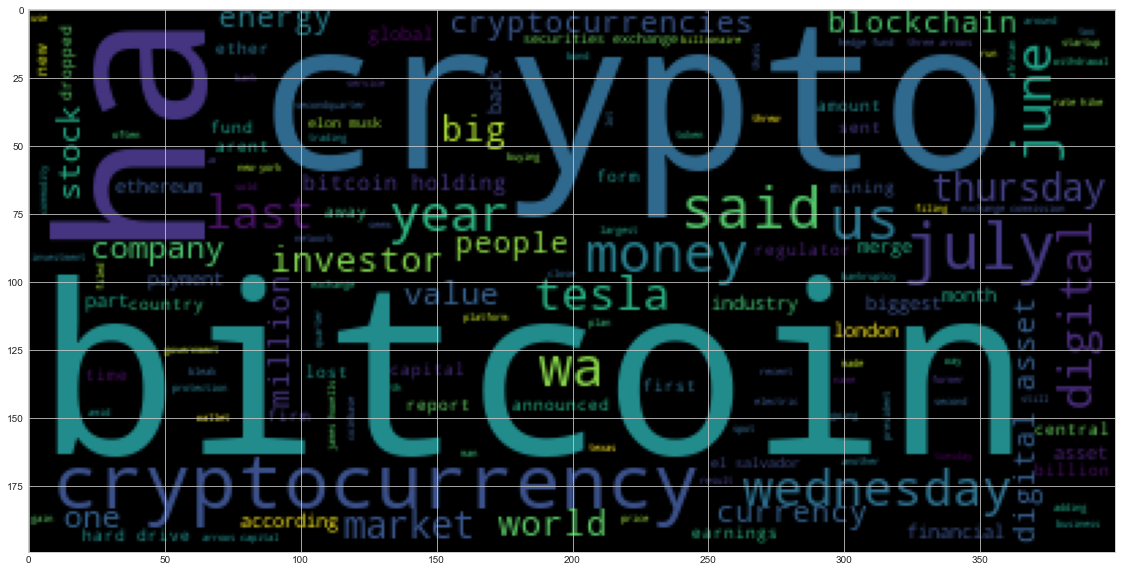

In [23]:
# Generate the Bitcoin word cloud
btc_wc_str = ' '.join([str(elem) for elem in [item for elem in btc_word_tokenized for item in elem]])
btc_wc = WordCloud().generate(btc_wc_str)
plt.imshow(btc_wc)

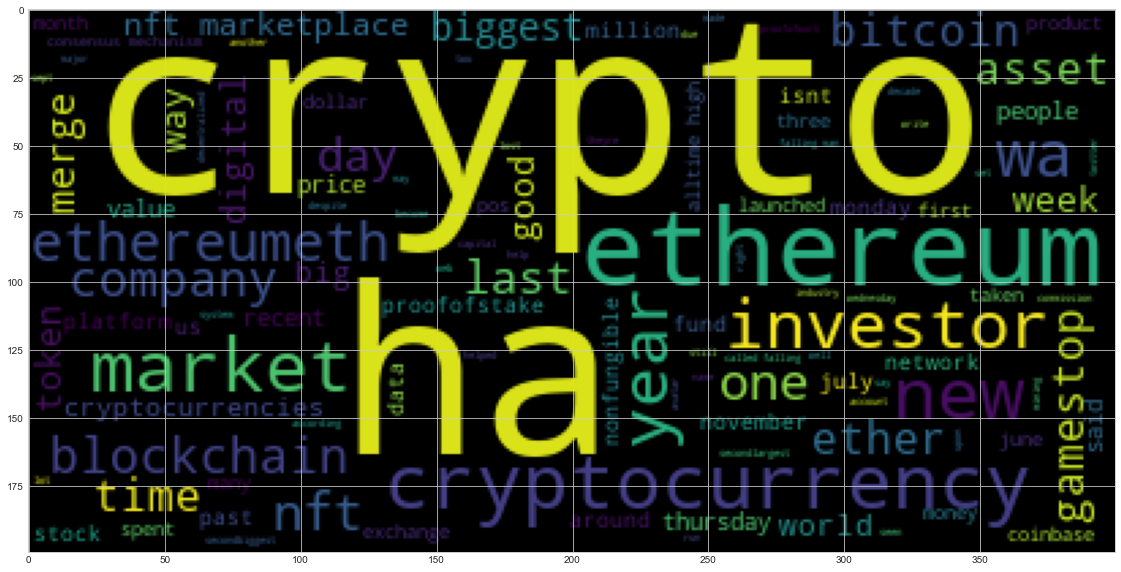

In [24]:
# Generate the Ethereum word cloud
eth_wc_str = ' '.join([str(elem) for elem in [item for elem in eth_word_tokenized for item in elem]])
eth_wc = WordCloud().generate(eth_wc_str)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
#!pip install spacy
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm
nlp = spacy.load('C:\\Users\\pogol\\anaconda3\\envs\\mlenv\\Lib\\site-packages\\en_core_web_sm\\en_core_web_sm-3.4.0')

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
# Load the spaCy model
#nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_text = []
for article in bitcoin_df.article:
    btc_text.append(article)
    
btc_text_str = ' '.join([str(elem) for elem in btc_text])
print(btc_text_str)

Miners voluntarily powered down as energy demand and prices spiked 
An aerial view of the Whinstone US Bitcoin mining facility in Rockdale, Texas, on October 9th, 2021. The long sheds at North Ameri… [+3770 chars] You gotta hand it to some people for being impetuous even in the face of extraordinary odds. Imagine looking for a single hard drive amidst a literal heap of trash. Well, thats been one UK mans goal … [+4091 chars] People in Russia will soon no longer be allowed to use digital assets as a form of payment. Russian president Vladimir Putin has signed a bill into law prohibiting the use of digital assets, such as … [+1436 chars] Three Arrows Capital, one of the crypto industrys biggest sinking ships, is finally being put out of its misery.
On Tuesday, the distressed crypto hedge fund was ordered into liquidation by a Virgin… [+2515 chars] Elon Musk-owned electric vehicle making company Tesla has sold a significant amount of its Bitcoin holdings, the firm said in a statement. Rep

In [29]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text_str)

# Add a title to the document
btc_ner.user_data['title'] = "Bitcoin Entity Recognition"

In [30]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [31]:
# List all Entities
btc_ent = [ent.text for ent in btc_ner.ents if ent.label_ in ['GPE', 'ORG']]
btc_ent

['the Whinstone US Bitcoin',
 'Rockdale',
 'Texas',
 'UK',
 'Russia',
 'Tesla',
 'the Securities and Exchange Commission',
 'US',
 'SEC',
 'Reuters',
 'Tesla',
 'Elon Musks',
 'Reuters',
 'Reuters',
 'El Salvador',
 'NEW YORK',
 'Reuters',
 'Tesla Inc',
 'Reuters',
 'The U.S. Securities and Exchange Commission',
 'Grayscale',
 'Reuters',
 'GMT',
 'the Environmental Protection Agency',
 'Department of Energy',
 'US',
 'Reuters',
 'Santa Lucia',
 'Reuters',
 'Jacobi Asset Management',
 'El Salvador',
 "CNN Business'",
 'Bell',
 'WASHINGTON',
 'Reuters',
 'U.S.',
 'NEW YORK',
 'Reuters',
 'Texas',
 'Reuters',
 'LONDON',
 'Reuters - The European Union',
 'El Salvador',
 'Mexico',
 'bitco',
 'NEW YORK',
 'Reuters',
 'The U.S. Securities and Exchange Commission',
 "Cathie Wood's",
 'Ukraine',
 "Fairlead Strategies'",
 'El Salvador',
 'the Securities and Exchange Commission',
 'NYSE',
 '] The European Union',
 'Xiaomi',
 'Sony',
 'Sony',
 'UK',
 'Newport',
 'Wales',
 'Coinbase Global',
 'COIN

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_text = []
for article in ethereum_df.article:
    eth_text.append(article)
    
eth_text_str = ' '.join([str(elem) for elem in eth_text])
print(eth_text_str)

Less than two weeks into its soft launch, GameStops NFT marketplace is already courting controversy. Among the NFTs listed on the platform is an artwork called Falling Man that was spotted by 
Web3 … [+1429 chars] Axie Infinity was the prime example of crypto gaming last year, when its play-to-earn formula helped it reach up to 2.7 million daily active users last November. But that all came crashing down in Ma… [+1604 chars] The Ethereum Merge is significant, and not just for people who own crypto. In the works in one form or another since 2014, the long-delayed Merge will see the second biggest blockchain reduce its car… [+10658 chars] Ethereum and Bitcoin have nearly become household names. However, while they're often mentioned in tandem, they're far from the same. 
Bitcoin was created as an alternative, decentralized currency. … [+9267 chars] Whether you own cryptocurrency or not, the Ethereum Merge is a big deal. In the works since 2014, the long-delayed Merge will see ethereum, t

In [33]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text_str)

# Add a title to the document
eth_ner.user_data['title'] = "Ethereum Entity Recognition"

In [34]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [35]:
# List all Entities
eth_ent = [ent.text for ent in eth_ner.ents if ent.label_ in ['GPE', 'ORG']]
eth_ent

['GameStops',
 'NFT',
 'the Ethereum Community Conference',
 'Paris',
 'Ethereum Merge',
 'Reuters',
 'Reuters',
 'Ethereum',
 'NIRV',
 'U.S.',
 'CoinGecko',
 'Blockchain.com',
 'Kraken',
 'Blockchain.com',
 'NFT',
 'Ethereum',
 'SkyBridge Capital',
 'The Legion Strategies',
 'Reuters) - Non',
 'NFT',
 'OpenSea',
 'Reuters',
 'GMT',
 'NFT',
 'Intels Arc Alchemist',
 'Intel',
 'NFT',
 'Kyiv',
 'Los Angeles',
 'FTX',
 'NFT',
 'the Bored Ape Yacht Club',
 'YouTube',
 'the British Army',
 'Army',
 'NFT',
 'NFT',
 'NFT',
 'NFT',
 'Ethereum',
 'Ethereum',
 's',
 'the Federal Reserve',
 'US',
 'Meta',
 'The Securities and Exchange Commission',
 'Ethereums PoS',
 'NFT',
 'NFT',
 'Ethereum',
 'Lazarus',
 'the U.S. Securities and Exchange Commission',
 'SEC',
 'CNBC',
 'American Express',
 'NEW YORK',
 'Reuters',
 'Reuters',
 'NFT',
 'Reuters',
 'NFT',
 'Ethereu',
 'Ethereum(ETH',
 'Ethereum',
 'the Nasdaq Composite',
 'Ethereum(ETH',
 'Shiba',
 'Amazon',
 'Tesla',
 'dApps',
 'Cryptocurrencies',

---